# Assessment Review

First up:

## Natural Language Processing Practice

Using the 'Spooky Authors' dataset: https://www.kaggle.com/c/spooky-author-identification/overview

In [1]:
# Imports
import pandas as pd
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

**Student 1:**

Please grab the dataset and look at a few aspects of this dataset (shape, some examples, etc). We'll be using just the train csv for this, for ease of use!

In [2]:
# Grab the train set from the competition 
df = pd.read_csv("spooky-author-identification/train.csv")

In [3]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
df.shape

(19579, 3)

In [5]:
# Exploring an example of one of the texts
df['text'][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [6]:
# Encoding our target from author initials to numbers
le = LabelEncoder()
df['target'] = le.fit_transform(df['author'])

In [7]:
# Checking that change
df.head()

,id,text,author,target
0,id26305,"This process, however, afforded me no means of...",EAP,0
1,id17569,It never once occurred to me that the fumbling...,HPL,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,1


In [8]:
# Grabbing our inputs and target
X = df['text']
y = df['target']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Grabbing a list of stopwords from NLTK, imported above
# We're also using the string library add punctuation to our list
stopwords_list = stopwords.words('english') + list(string.punctuation)

In [10]:
stopwords_list[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

**Student 2:**

What is the point of a list of stopwords? How/why will we use this list?

- 


### "Bag of Words" - Count Vectorizer

Useful link to the 'User Guide' part of the documentation on this: https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage

In [101]:
# Intstantiating our vectorizer
count_vectorizer = CountVectorizer()

# Training on the train set, then transforming the train set
X_count_train = count_vectorizer.fit_transform(X_train)
# Transforming the test set
X_count_test = count_vectorizer.transform(X_test)

In [14]:
# Instantiating a classifier to use on this text - Multinomial Naive Bayes
nb_classifier = MultinomialNB() 

# Fitting the classifier
nb_classifier.fit(X_count_train, y_train)

# Getting our predictions for the train and test sets
train_preds = nb_classifier.predict(X_count_train)
test_preds = nb_classifier.predict(X_count_test)

0.8330949948927477


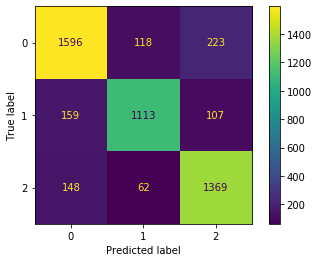

In [15]:
# Let's see how we did!
print(accuracy_score(y_test, test_preds))
plot_confusion_matrix(nb_classifier, X_count_test, y_test, 
                      values_format = ".4g") # to make numbers readable
plt.show()

**Student 3:**

Discuss! How did we do? What could we change?

- 


We're about to try this on a few different vectorizers, so let's make that easier!

**Student 4:**

Write a function where we can provide an instantiated vectorizer, an instantiated classifer, and all of our train and test data, and the function will spit out the accuracy score and confusion matrix just like above:

In [191]:
def classify_vectorized_text(vectorizer, classifier, Xtrain, Xtest, ytrain, ytest):
    '''
    Fit and transform text data using the provided vectorizer, then fit and 
    predict with the provided classifier, in order to see the resulting
    accuracy score and confusion matrix
    For the Xtrain, Xtest, ytrain, ytest, expect the output of an
    sklearn train/test split
    -
    Inputs:
    vectorizer: an instantiated sklearn vectorizer
    classifier: an instantiated sklearn classifier
    X_train: training input data
    X_test: testing input data
    y_train: training true result
    y_test: testing true result
    -
    Outputs: 
    train_preds: predicted results for the train set
    test_preds: predicted results for the test set
    '''
    
    Xtrain_transformed = vectorizer.fit_transform(Xtrain)
    Xtest_transformed = vectorizer.transform(Xtest)
    
    classifier.fit(Xtrain_transformed, ytrain)

    train_preds = classifier.predict(Xtrain_transformed)
    test_preds = classifier.predict(Xtest_transformed)
    
    print(accuracy_score(ytest, test_preds))
    plot_confusion_matrix(classifier, Xtest_transformed, ytest, 
                          values_format = ".4g") # to make numbers readable
    plt.show()
    
    return(train_preds, test_preds)

**Student 5:**

Please add in something that was missing from our first Count Vectorizer:

Link to the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [16]:
count_stop = CountVectorizer(stop_words = stopwords_list)

**Student 6:**

Please create a new classifier and compare the results, using our previously-defined function!

0.8286006128702758


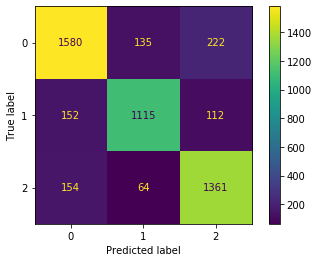

In [192]:
nb_stop = MultinomialNB()

stop_train_preds, stop_test_preds = classify_vectorized_text(count_stop, nb_stop, X_train, X_test, y_train, y_test)

Compare: 

- 


### TF-IDF: Term-Frequency - Inverse Document-Frequency

Bryan talked about this... but what even is it?

From [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html):

> "The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus."

Basically, it's a statistic that hopefully reflects how important a word is in the document. By looking at the overall frequency you find how common a word is across the whole corpus, compared to the document frequency that shows how common a word is within the document in question. If a word appears often in our document, but relatively rarely in the corpus, it probably captures an important word in that specific document!

In this example, the training corpus is every sentence in the `text` column in our train set, and the document is the individual sentence that we're trying to classify (per row).

Reference: http://www.tfidf.com/

We'll be using Sklearn's [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), which is 'equivalent to CountVectorizer followed by TfidfTransformer'

In [139]:
# Instantiating the vectorizer
tfidf = TfidfVectorizer(stop_words=stopwords_list, use_idf=True)

# Training on the train set, then transforming the train set
tfidf_train = tfidf.fit_transform(X_train)
# Transforming the test set
tfidf_test = tfidf.transform(X_test)

In [140]:
tfidf_df = pd.DataFrame(tfidf.idf_, index=tfidf.get_feature_names(),columns=["idf_weights"])

In [173]:
tfidf_df.sort_values(by='idf_weights', ascending=False).head(10)

,idf_weights
aaem,9.901435
louisa,9.901435
loutish,9.901435
loveless,9.901435
lovingly,9.901435
lowed,9.901435
lowell,9.901435
lowness,9.901435
loyalty,9.901435
lucan,9.901435


In [188]:
# Let's look at a specific example for one row
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(), columns=tfidf.vocabulary_.keys())

test_doc = tfidf_test_df.iloc[16]
print(test_doc.idxmax(axis=1))
print(test_doc[test_doc.idxmax(axis=1)])

chivalry
0.5980220284052462


This tells you that for the 17th document in our test set, the word 'chivalry' has the highest TF-IDF value.

**Student 7:**

What does this tell you about the word "chivalry" in the this document of our test set?

- 


0.8106230847803881


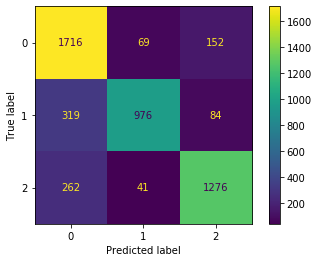

In [196]:
# Using our function to compare the results...
tfidf = TfidfVectorizer(stop_words=stopwords_list, use_idf=True)
nb_tfidf = MultinomialNB()

tfidf_train_preds, tfidf_test_preds = classify_vectorized_text(tfidf, nb_tfidf, X_train, X_test, y_train, y_test)

Compare:

- 


0.7076608784473953


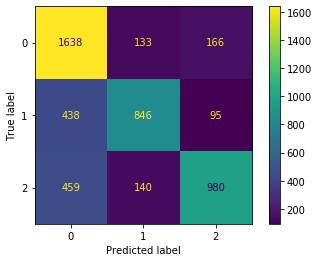

In [195]:
# We can also use our function to try different classifiers
tfidf = TfidfVectorizer(stop_words=stopwords_list, use_idf=True)
rfc = RandomForestClassifier(n_estimators=100)

rfc_train_preds, rfc_test_preds = classify_vectorized_text(tfidf, rfc, X_train, X_test, y_train, y_test)

Compare: 

- 


## Further Review!

![](kmeans.gif)

**Student 8:**

Please describe the steps of a k-means clustering algorithm:

- 


![](pca.gif)

**Student 9:**

Please describe how principal component analysis works:

- 
